In [54]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, precision_score,recall_score, f1_score, precision_recall_curve
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
%matplotlib inline

In [55]:
import nltk

In [56]:
from nltk.probability import ConditionalFreqDist
from nltk.corpus import webtext
from nltk.corpus import wordnet as wn


from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
#COsine similarity
from sklearn.metrics.pairwise import cosine_similarity



In [57]:
import nltk
classifer=nltk.NaiveBayesClassifier.train(train_set)

NameError: name 'train_set' is not defined

In [ ]:
tweet_data = pd.read_csv('train.csv')

In [ ]:
print(tweet_data.shape)
print(tweet_data.size)

In [ ]:
tweet_data.head(15)

In [ ]:
tweet_data.isna().sum()

In [ ]:
tweet_data=tweet_data.dropna()

In [58]:
tweet_data.isna().sum()

text         0
sentiment    0
dtype: int64

In [59]:
print(tweet_data.shape)
print(tweet_data.size)

(27447, 2)
54894


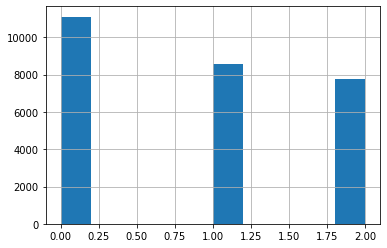

In [60]:
tweet_data['sentiment'].hist()

In [61]:
# mapping categorical data to number
def mapping_cat_to_num(col_name):
    tweet_data[col_name].unique()
    col_list = list(tweet_data[col_name].unique())
    col_dict = {}
    for i in range (len(col_list)):
        col_dict[col_list[i]] = i
    return col_dict


clean_nums={}
clean_nums =mapping_cat_to_num('sentiment')
clean_nums

{0: 0, 1: 1, 2: 2}

In [62]:
tweet_data.replace(clean_nums,inplace=True)

In [63]:
tweet_data.head()

,text,sentiment
0,"oh Marly, I`m so sorry!! I hope you find her...",0
1,Playing Ghost Online is really interesting. Th...,1
2,is cleaning the house for her family who is co...,0
3,gotta restart my computer .. I thought Win7 wa...,0
4,SEe waT I Mean bOuT FoLL0w fRiiDaYs... It`S cA...,0


In [64]:
tweet_data['sentiment'].astype('float').tail()

27443    2.0
27444    2.0
27445    1.0
27446    0.0
27447    1.0
Name: sentiment, dtype: float64

In [67]:
tweet_data['sentiment'].value_counts()

0    11105
1     8575
2     7767
Name: sentiment, dtype: int64

In [69]:
tweet_data['text'] = tweet_data['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
tweet_data['text'].head()

0    oh marly, i`m so sorry!! i hope you find her s...
1    playing ghost online is really interesting. th...
2    is cleaning the house for her family who is co...
3    gotta restart my computer .. i thought win7 wa...
4    see wat i mean bout foll0w friidays... it`s ca...
Name: text, dtype: object

In [71]:
#stopwords
from nltk.corpus import stopwords
tweet_data['text'] = tweet_data['text'].apply(lambda x : ' '.join([word for word in x.split() 
                                                                   if not word in set(stopwords.words('english'))]))

In [76]:
import re
import string

#Citation: Borrowed a few regex'es from Google
def process_tweets(text):
    text = str(text).lower() #lower
    text = re.sub('\[.*?\]', '', text) #Remove text in square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text) #Hyperlinks removal
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #punctuations
    text = re.sub('\n', '', text) #newlines
    text = re.sub('\w*\d\w*', '', text) #word containing numbers
    return text

In [77]:
#Pre-process the tweets
tweet_data['text'] = tweet_data['text'].apply(lambda x:process_tweets(x))

In [80]:
tweet_data['text'].tail()

27443    like drew said give tc chance miss thomas move...
27444    rec gametrying crythe pain muchi need himcant ...
27445          sure ill try n keep up p enjoy studying cya
27446    naw pretty tame  guy costume voyagerstyle medi...
27447            morning twitfriends welcome new followers
Name: text, dtype: object

In [85]:
#Stemming
stemmer = PorterStemmer()
tokenized_tweet = tweet_data['text'].apply(lambda x: x.split()) 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
print(tokenized_tweet.head())
tweets_training_set = []
for item in tokenized_tweet:
    tweets_training_set.append(' '.join(item))
print (len(tweets_training_set))

0             [oh, marli, im, sorri, hope, find, soon]
1    [play, ghost, onlin, realli, interest, new, up...
2             [clean, hous, famili, com, later, today]
3    [gotta, restart, comput, thought, suppos, put,...
4    [see, wat, mean, bout, friiday, it, call, lose...
Name: text, dtype: object
27447


In [86]:
tweet_data.head()

,text,sentiment
0,oh marly im sorry hope find soon,0
1,playing ghost online really interesting new up...,1
2,cleaning house family comming later today,0
3,gotta restart computer thought supposed put ...,0
4,see wat mean bout friidays its called lose f...,0


In [90]:
tweet_data['Analyzed_Tweet'] = tweets_training_set
tweet_data.head()

,text,sentiment,Analyzed_Tweet,Tokenized tweet
0,oh marly im sorry hope find soon,0,oh marli im sorri hope find soon,"[oh, marli, im, sorri, hope, find, soon]"
1,playing ghost online really interesting new up...,1,play ghost onlin realli interest new updat kir...,"[play, ghost, onlin, realli, interest, new, up..."
2,cleaning house family comming later today,0,clean hous famili com later today,"[clean, hous, famili, com, later, today]"
3,gotta restart computer thought supposed put ...,0,gotta restart comput thought suppos put end co...,"[gotta, restart, comput, thought, suppos, put,..."
4,see wat mean bout friidays its called lose f...,0,see wat mean bout friiday it call lose friday smh,"[see, wat, mean, bout, friiday, it, call, lose..."


In [91]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27447 entries, 0 to 27447
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text             27447 non-null  object
 1   sentiment        27447 non-null  int64 
 2   Analyzed_Tweet   27447 non-null  object
 3   Tokenized tweet  27447 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


## Naive Bayes

In [131]:
TfidfVectorizer()

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [129]:
# TfTfidfVectorizer()
TFIDF_vector = TfidfVectorizer(max_features=3000) 
X = TFIDF_vector.fit_transform(tweet_data['text'].tolist()).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, tweet_data['sentiment'], test_size = 0.20, random_state = 2)


from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

naive_bayes = MultinomialNB().fit(X_train, y_train)

y_pred=naive_bayes.predict(X_test)

print("Accuracy\n",accuracy_score(y_test, y_pred))
print("\n\nCOnfusion Matrix\n",confusion_matrix(y_test, y_pred))
print("\n\nClassification Report\n",classification_report(y_test, y_pred))

Accuracy
 0.6355191256830601


COnfusion Matrix
 [[1710  283  200]
 [ 628 1029   64]
 [ 757   69  750]]


Classification Report
               precision    recall  f1-score   support

           0       0.55      0.78      0.65      2193
           1       0.75      0.60      0.66      1721
           2       0.74      0.48      0.58      1576

    accuracy                           0.64      5490
   macro avg       0.68      0.62      0.63      5490
weighted avg       0.67      0.64      0.63      5490



In [123]:
CountVectorizer()

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [130]:
#changing the vector
count_vector = CountVectorizer(max_features=3000) 
X = count_vector.fit_transform(tweet_data['text'].tolist()).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, tweet_data['sentiment'], test_size = 0.20, random_state = 2)

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

naive_bayes = MultinomialNB().fit(X_train, y_train)

y_pred=naive_bayes.predict(X_test)

print("Accuracy\n",accuracy_score(y_test, y_pred))
print("\n\nCOnfusion Matrix\n",confusion_matrix(y_test, y_pred))
print("\n\nClassification Report\n",classification_report(y_test, y_pred))

Accuracy
 0.6500910746812386


COnfusion Matrix
 [[1509  360  324]
 [ 494 1136   91]
 [ 570   82  924]]


Classification Report
               precision    recall  f1-score   support

           0       0.59      0.69      0.63      2193
           1       0.72      0.66      0.69      1721
           2       0.69      0.59      0.63      1576

    accuracy                           0.65      5490
   macro avg       0.67      0.64      0.65      5490
weighted avg       0.66      0.65      0.65      5490

